In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight
import pickle
from sklearn.feature_selection import mutual_info_classif

In [3]:
# Load dataset
df = pd.read_csv('new_dataset.csv')
df.head()

,career_path,expertise_level,working_frequency,tech_news_frequency,willingness_to_learn,interest_visual_elements,interest_user_behavior,math_background,interest_working_with_data,interest_data_analysis,interest_data_insights,interest_ml_algorithms,interest_server_side,interest_innovation,interest_mobile_apps,concern_digital_security,interest_security_concepts,interest_design_thinking,interest_web
0,Frontend Developer,Intermediate,Weekly,Weekly,Yes,Yes,yes,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes
1,Frontend Developer,Beginner,Weekly,Weekly,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes
2,Backend Developer,Expert,Daily,Weekly,Yes,No,No,No,No,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes
3,UI/UX Designer,Intermediate,Weekly,Daily,No,Yes,yes,No,No,No,No,No,No,No,No,No,No,No,No
4,Data Scientist,Beginner,Daily,Daily,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,No,No,No,Yes,No


In [4]:
# Encoding categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [5]:
df.head()

,career_path,expertise_level,working_frequency,tech_news_frequency,willingness_to_learn,interest_visual_elements,interest_user_behavior,math_background,interest_working_with_data,interest_data_analysis,interest_data_insights,interest_ml_algorithms,interest_server_side,interest_innovation,interest_mobile_apps,concern_digital_security,interest_security_concepts,interest_design_thinking,interest_web
0,3,2,4,4,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1
1,3,0,4,4,1,1,0,1,1,0,0,1,1,1,0,1,0,1,1
2,0,1,0,4,1,0,0,0,0,1,0,0,1,1,0,1,1,0,1
3,6,2,4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,1,0


In [6]:
# Split features and target variable
X = df.drop(columns=['career_path'])
y = df['career_path']

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

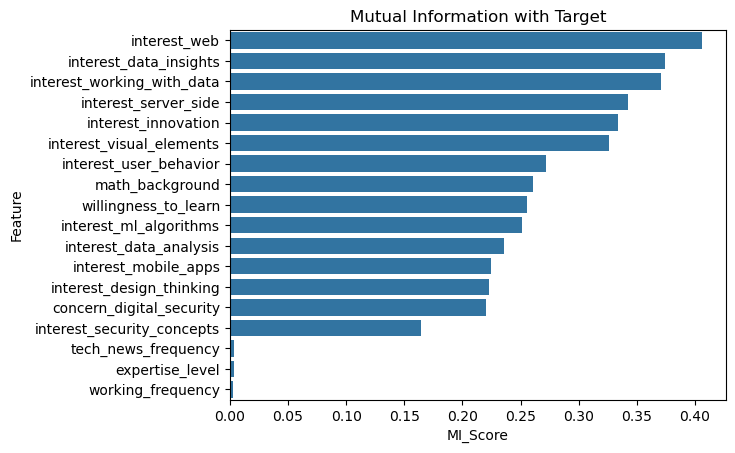

In [10]:
mi_scores = mutual_info_classif(X, y, discrete_features=True)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

# Mutual Information plot
sns.barplot(data=mi_df, x='MI_Score', y='Feature')
plt.title('Mutual Information with Target')
plt.show()

In [8]:
print(df['career_path'].value_counts())

career_path
0    1267
6    1222
3    1208
5    1196
1    1185
2    1178
4    1160
Name: count, dtype: int64


In [9]:
# Train models
# models = {
#     'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
#     'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
#     'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
# }

# results = {}
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     results[name] = accuracy
#     print(f'\n{name} Model Evaluation:')
#     print(classification_report(y_test, y_pred))


Decision Tree Model Evaluation:
Accuracy: 0.8539
              precision    recall  f1-score   support

           0      0.822     0.770     0.795       270
           1      0.866     0.892     0.878       231
           2      0.859     0.839     0.849       218
           3      0.888     0.852     0.870       243
           4      0.857     0.888     0.872       242
           5      0.831     0.854     0.842       247
           6      0.860     0.893     0.876       233

    accuracy                          0.854      1684
   macro avg      0.855     0.856     0.855      1684
weighted avg      0.854     0.854     0.854      1684



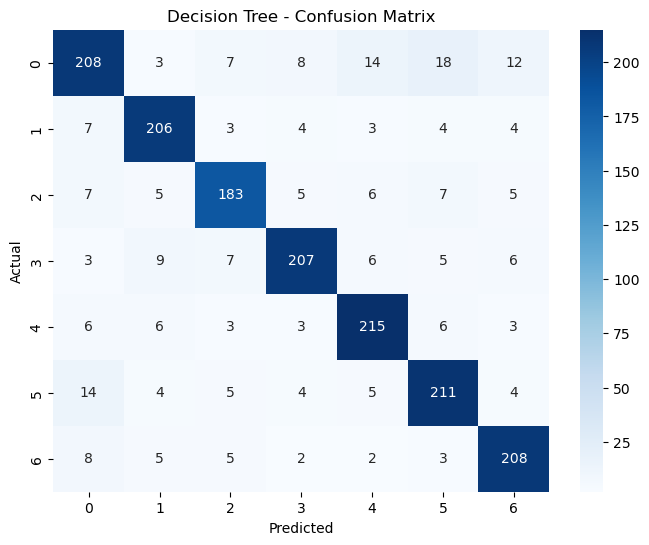


Random Forest Model Evaluation:
Accuracy: 0.8616
              precision    recall  f1-score   support

           0      0.802     0.767     0.784       270
           1      0.877     0.892     0.884       231
           2      0.833     0.849     0.841       218
           3      0.894     0.868     0.881       243
           4      0.911     0.893     0.902       242
           5      0.839     0.887     0.862       247
           6      0.881     0.888     0.885       233

    accuracy                          0.862      1684
   macro avg      0.863     0.863     0.863      1684
weighted avg      0.862     0.862     0.861      1684



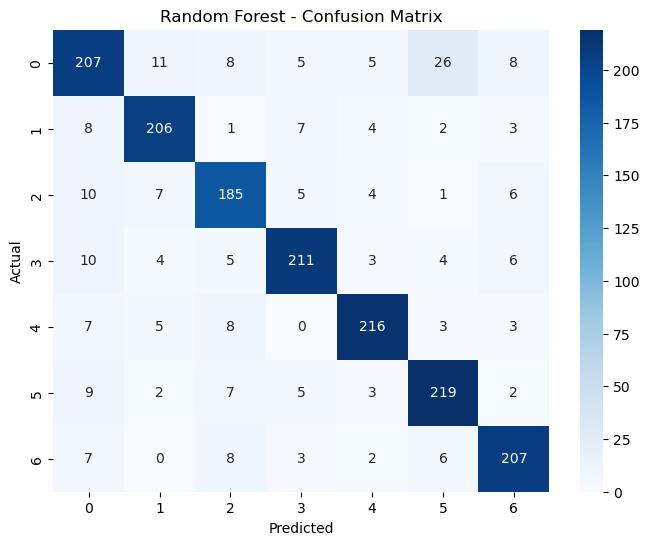

C:\Users\hasit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:10:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Model Evaluation:
Accuracy: 0.8628
              precision    recall  f1-score   support

           0      0.815     0.781     0.798       270
           1      0.887     0.883     0.885       231
           2      0.864     0.844     0.854       218
           3      0.871     0.889     0.880       243
           4      0.896     0.888     0.892       242
           5      0.858     0.879     0.868       247
           6      0.855     0.884     0.869       233

    accuracy                          0.863      1684
   macro avg      0.864     0.864     0.864      1684
weighted avg      0.863     0.863     0.863      1684



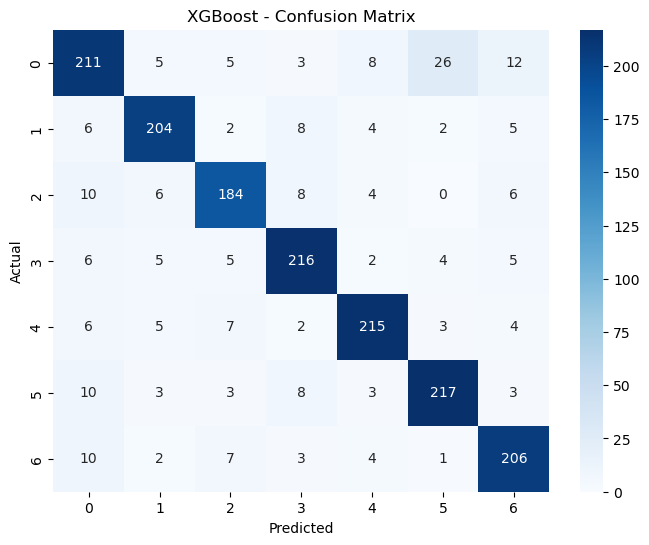

In [10]:
# Compute sample weights for XGBoost
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = {}

for name, model in models.items():
    if name == 'XGBoost':
        model.fit(X_train, y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f'\n{name} Model Evaluation:')
    print(f'Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred, digits=3))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [11]:
# Compare models
best_model = max(results, key=results.get)
print(f'\nBest Performing Model: {best_model} with Accuracy: {results[best_model]:.4f}')


Best Performing Model: XGBoost with Accuracy: 0.8628


In [10]:
# Display encoded values and their corresponding real values
for col, le in label_encoders.items():
    print(f"\nColumn: {col}")
    for index, class_ in enumerate(le.classes_):
        print(f"{class_} -> {index}")


Column: career_path
Backend Developer -> 0
Cyber Security Engineer -> 1
Data Scientist -> 2
Frontend Developer -> 3
ML Engineer -> 4
Mobile App Developer -> 5
UI/UX Designer -> 6

Column: expertise_level
Beginner -> 0
Expert -> 1
Intermediate -> 2

Column: working_frequency
Daily -> 0
Monthly -> 1
Never -> 2
Rarely -> 3
Weekly -> 4

Column: tech_news_frequency
Daily -> 0
Monthly -> 1
Never -> 2
Rarely -> 3
Weekly -> 4

Column: willingness_to_learn
No -> 0
Yes -> 1

Column: interest_visual_elements
No -> 0
Yes -> 1

Column: interest_user_behavior
No -> 0
yes -> 1

Column: math_background
No -> 0
Yes -> 1

Column: interest_working_with_data
No -> 0
Yes -> 1

Column: interest_data_analysis
No -> 0
Yes -> 1

Column: interest_data_insights
No -> 0
Yes -> 1

Column: interest_ml_algorithms
No -> 0
Yes -> 1

Column: interest_server_side
No -> 0
Yes -> 1

Column: interest_innovation
No -> 0
Yes -> 1

Column: interest_mobile_apps
No -> 0
Yes -> 1

Column: concern_digital_security
No -> 0
Yes ->

In [11]:
# Train the Random Forest model separately
random_forest_model = RandomForestClassifier(class_weight='balanced', random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Model Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Random Forest Model Accuracy: 0.8616

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       270
           1       0.88      0.89      0.88       231
           2       0.83      0.85      0.84       218
           3       0.89      0.87      0.88       243
           4       0.91      0.89      0.90       242
           5       0.84      0.89      0.86       247
           6       0.88      0.89      0.88       233

    accuracy                           0.86      1684
   macro avg       0.86      0.86      0.86      1684
weighted avg       0.86      0.86      0.86      1684



In [12]:
X_train.columns

Index(['expertise_level', 'working_frequency', 'tech_news_frequency',
       'willingness_to_learn', 'interest_visual_elements',
       'interest_user_behavior', 'math_background',
       'interest_working_with_data', 'interest_data_analysis',
       'interest_data_insights', 'interest_ml_algorithms',
       'interest_server_side', 'interest_innovation', 'interest_mobile_apps',
       'concern_digital_security', 'interest_security_concepts',
       'interest_design_thinking', 'interest_web'],
      dtype='object')

In [29]:
model.predict([[0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]])

array([2], dtype=int64)

In [14]:
# Get probability estimates
probabilities = model.predict_proba([[0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]])

# Get class labels
class_labels = model.classes_

# Map class labels to their respective probabilities
matching_values = dict(zip(class_labels, (probabilities[0] * 100).round(2)))
print(matching_values)

{0: 4.57, 1: 4.75, 2: 87.27, 3: 0.49, 4: 0.12, 5: 0.23, 6: 2.56}


In [15]:
# Export the model as a pickle file
with open('prediction_model.pickle', 'wb') as file:
    pickle.dump(model, file)